# ANN (MNIST)

In [1]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2970 - accuracy: 0.9146 - val_loss: 0.1500 - val_accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.1432 - accuracy: 0.9573 - val_loss: 0.1050 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1057 - accuracy: 0.9681 - val_loss: 0.0866 - val_accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 2s 995us/step - loss: 0.0891 - accuracy: 0.9726 - val_loss: 0.0765 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0753 - accuracy: 0.9761 - val_loss: 0.0799 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 0.0781 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.0595 - accuracy: 0.9808 - val_loss: 0.0727 - val_acc

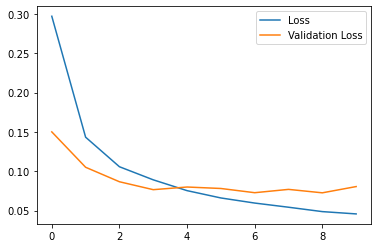

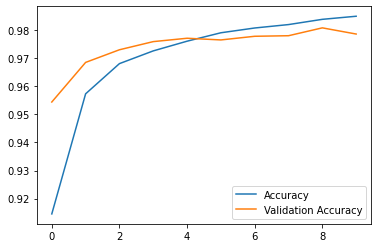

313/313 [==============================] - 0s 868us/step - loss: 0.0805 - accuracy: 0.9786
Accuracy: 0.978600025177002


In [4]:
i = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(i)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=10)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

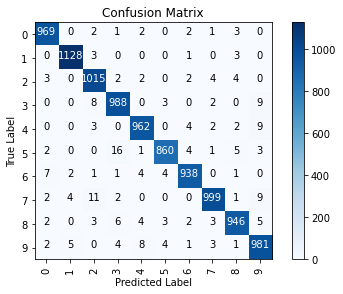

In [5]:
def plot_confusion_matrix(cm, labels):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    num_classes = len(labels)
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    
    threshold = cm.max() / 2
    for i, j in itertools.product(range(num_classes), range(num_classes)):
        plt.text(j, i, cm[i, j],
                 ha='center',
                 color='white' if cm[i, j] > threshold else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Display a random misclassified image

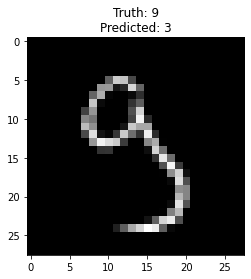

In [6]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'Truth: {y_test[i]}\nPredicted: {p_test[i]}')
plt.show()